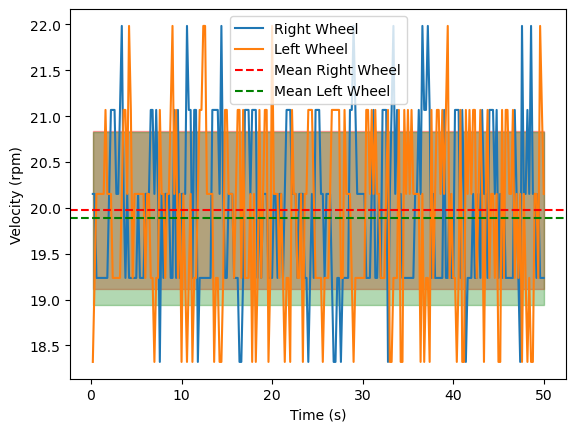

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_direct = 'prompt1203'
rpm = 20
id_num = 0
# Read in the data
df = pd.read_csv('/home/' + file_direct+ '/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_'+str(rpm)+'_id_'+str(id_num)+'.csv')

#plot data

time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

std_right_wheel = np.std(right_wheel)
std_left_wheel = np.std(left_wheel)

fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.fill_between(time, mean_right_wheel-std_right_wheel, mean_right_wheel+std_right_wheel, color='r', alpha=0.3)
ax.fill_between(time, mean_left_wheel-std_left_wheel, mean_left_wheel+std_left_wheel, color='g', alpha=0.3)

ax.legend()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')
plt.show()



In [226]:
mean_array = []
std_array = []

rpm = 20
# id_num = 1
rpm_range = 80
id__range = 3
# Read in the data
for rpm in range(10,rpm_range,10):
    for id_num in range(0,id__range,1):
        df = pd.read_csv('/home/' + file_direct+ '/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_'+str(rpm)+'_id_'+str(id_num)+'.csv')

    #plot data
        time = df['time']
        right_wheel = df['left_wheel_vel']
        left_wheel = df['right_wheel_vel']

        # Convert to np array
        time = np.array(time)
        right_wheel = np.array(right_wheel)
        left_wheel = np.array(left_wheel)

        mean_right_wheel = np.mean(right_wheel)
        mean_left_wheel = np.mean(left_wheel)
        mean_array.append([mean_right_wheel,mean_left_wheel])
        std_right_wheel = np.std(right_wheel)
        std_left_wheel = np.std(left_wheel)
        std_array.append([std_right_wheel,std_left_wheel])
print(mean_array)
print(std_array)
# print("mean of_"+str(rpm)+"_id_"+str(id_num),"left_wheel:"+str(mean_left_wheel),"right_wheel:"+str(mean_right_wheel))
# print("std of_"+str(rpm)+"_id_"+str(id_num),"left_wheel:"+str(std_left_wheel),"right_wheel:"+str(std_right_wheel))


[[9.885471789215982, 9.878143806752341], [9.764559987496698, 9.819519997131257], [9.801199980638815, 9.764559979528146], [19.976128262206483, 19.88819213568678], [19.979792107727604, 20.04574406373687], [19.873536107011063, 19.877200025387534], [29.931216331066093, 30.00449623766479], [30.02281632587422, 30.125408144113642], [29.96052837020369, 30.03014422637559], [39.94126484669237, 40.157440670879275], [40.04385671046639, 39.98523284165033], [40.15011267930872, 40.02187272664778], [50.00993642061892, 50.156496780231436], [50.079552513570704, 50.15283244749016], [50.028256426866086, 50.14550463805797], [60.08960098366239, 60.25081685285625], [60.15555227031313, 60.21784102739251], [60.10425649324374, 60.24348924377629], [69.42180563448314, 69.36318119193119], [69.41814146566638, 69.24959693098998], [69.3888294265288, 69.41814115603117]]
[[0.6834710840579822, 0.9239094310334951], [2.6064023129701317, 2.8014628755272275], [2.5388241461620433, 2.8440877870146815], [0.8647040084766496, 0.

In [227]:
data_path = '/home/prompt1203/FRA532_Exam/src/pmzbbot_sensors/calibration/'

def read_data(data_path, expr_num, rpm, id_num_range, base_df):
    

    for num in range(1, id_num_range):
        dpath = data_path + 'Experiment_' + str(expr_num) + '_' + str(rpm) + '_id_' + str(num) + '.csv'
        df = pd.read_csv(dpath)
        # Add the experiment rpm to the dataframe
        df['rpm'] = rpm
        # Concatenate the dataframes
        base_df = pd.concat([base_df, df], ignore_index=True)

    return base_df

In [228]:
base_df = pd.DataFrame(columns=['time', 'right_wheel_vel', 'left_wheel_vel'])

for rpm in range(10, 80, 10):
    base_df = read_data(data_path, 1, rpm, 3, base_df)

/tmp/ipykernel_7612/1228974339.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  base_df = pd.concat([base_df, df], ignore_index=True)


In [229]:
# Remove time column
base_df = base_df.drop(columns=['time'])
base_df

,right_wheel_vel,left_wheel_vel,rpm
0,6.412000,7.328000,10.0
1,6.412000,5.496000,10.0
2,8.244000,8.244000,10.0
3,13.740000,10.992000,10.0
4,12.824000,13.740000,10.0
...,...,...,...
3495,70.531999,73.279998,70.0
3496,68.699996,70.531999,70.0
3497,68.699996,70.531999,70.0
3498,69.615997,69.615997,70.0


In [230]:
# true_rpm = np.arange(10, 80, 10)

# fig, ax = plt.subplots()
# ax.errorbar(true_rpm, right_wheel_mean_list, yerr=right_wheel_std_list, label='Right Wheel')
# ax.errorbar(true_rpm, left_wheel_mean_list, yerr=left_wheel_std_list, label='Left Wheel')
# ax.legend()
# plt.xlabel('True RPM')
# plt.ylabel('Velocity (rpm)')
# plt.show()

Right Wheel: Slope = 1.00, Intercept = 0.04
Left Wheel: Slope = 1.00, Intercept = 0.01


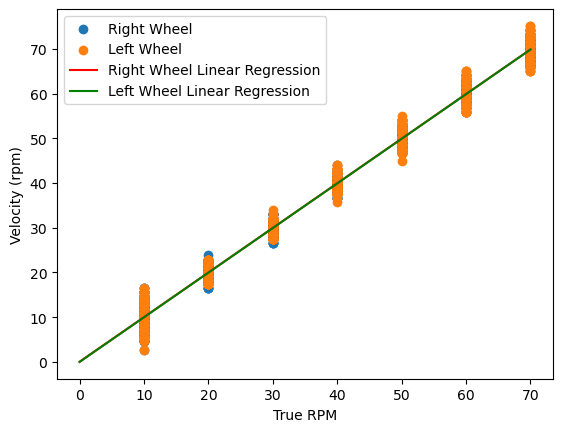

In [231]:
# Fine Linear Regression

from sklearn.linear_model import LinearRegression

# Create the model for the right wheel
model_right = LinearRegression()
X = base_df['rpm'].values.reshape(-1, 1)
y = base_df['right_wheel_vel']

model_right.fit(X, y)

# Get the model parameters
right_slope = model_right.coef_
right_intercept = model_right.intercept_

# Create the model for the left wheel
model_left = LinearRegression()
X = base_df['rpm'].values.reshape(-1, 1)
y = base_df['left_wheel_vel']

model_left.fit(X, y)

# Get the model parameters
left_slope = model_left.coef_
left_intercept = model_left.intercept_


print(f'Right Wheel: Slope = {right_slope[0]:.2f}, Intercept = {right_intercept:.2f}')
print(f'Left Wheel: Slope = {left_slope[0]:.2f}, Intercept = {left_intercept:.2f}')


# Linear Regression function for the right wheel
def right_wheel_rpm(rpm, slope, intercept):
    return slope * rpm + intercept

# Linear Regression function for the left wheel
def left_wheel_rpm(rpm, slope, intercept):
    return slope * rpm + intercept

# Plot the linear regression
fig, ax = plt.subplots()
ax.scatter(base_df['rpm'], base_df['right_wheel_vel'], label='Right Wheel')
ax.scatter(base_df['rpm'], base_df['left_wheel_vel'], label='Left Wheel')
# Plot the linear regression
x = np.arange(0, 80, 10)
y = right_wheel_rpm(x, right_slope, right_intercept)
ax.plot(x, y, label='Right Wheel Linear Regression', color='r')
y = left_wheel_rpm(x, left_slope, left_intercept)
ax.plot(x, y, label='Left Wheel Linear Regression', color='g')
ax.legend()
plt.xlabel('True RPM')
plt.ylabel('Velocity (rpm)')
plt.show()


In [232]:
# Get Inverse of the Linear Regression
def inverse_right_wheel_rpm(vel, slope, intercept):
    return (vel - intercept) / slope

def inverse_left_wheel_rpm(vel, slope, intercept):
    return (vel - intercept) / slope


# Test the inverse function
vel = 15
print(f'Right Wheel: RPM = {inverse_right_wheel_rpm(vel, right_slope[0], right_intercept):.2f}')
print(f'Left Wheel: RPM = {inverse_left_wheel_rpm(vel, left_slope[0], left_intercept):.2f}')

# Print slope and intercept
print(f'Right Wheel: Slope = {right_slope[0]:.6f}, Intercept = {right_intercept:.6f}')
print(f'Left Wheel: Slope = {left_slope[0]:.6f}, Intercept = {left_intercept:.6f}')


Right Wheel: RPM = 15.00
Left Wheel: RPM = 15.03
Right Wheel: Slope = 0.997269, Intercept = 0.044754
Left Wheel: Slope = 0.997609, Intercept = 0.007852


In [233]:
tarrpm = 40

Right Wheel mean: 9.76, Left Wheel mean: 9.82


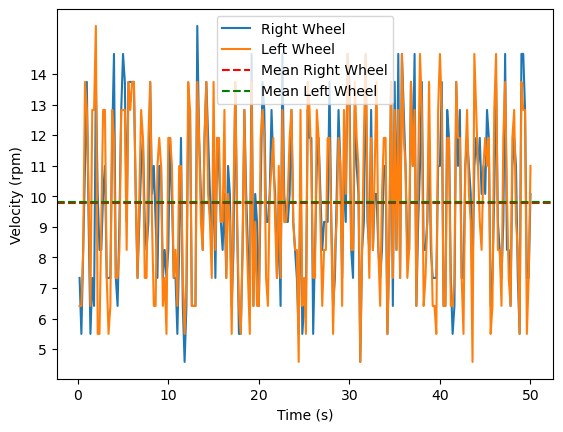

In [234]:
df = pd.read_csv(f'/home/{file_direct}/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_{tarrpm}_id_1.csv')
# /home/prompt1203/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_10_id_0.csv
#Plot df Data
time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

# Calculate Mean
mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

# Plot the data
fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.legend()
plt.yticks(np.arange(tarrpm-5,tarrpm+5,1))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')

print(f'Right Wheel mean: {mean_right_wheel:.2f}, Left Wheel mean: {mean_left_wheel:.2f}')


Right Wheel mean: 9.80, Left Wheel mean: 9.76


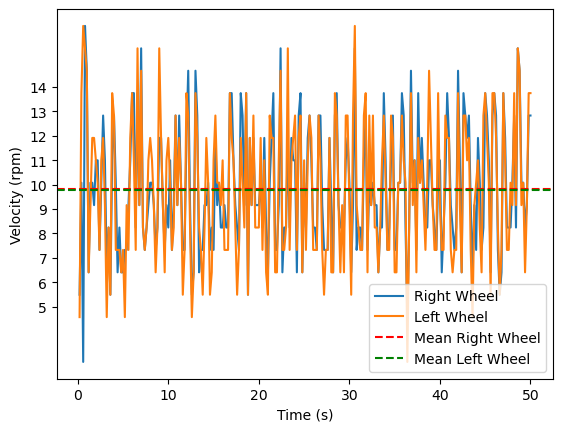

In [235]:
df = pd.read_csv(f'/home/{file_direct}/FRA532_Exam/src/pmzbbot_sensors/calibration/Experiment_1_{tarrpm}_id_2.csv')

#Plot df Data
time = df['time']
right_wheel = df['left_wheel_vel']
left_wheel = df['right_wheel_vel']

# Convert to np array
time = np.array(time)
right_wheel = np.array(right_wheel)
left_wheel = np.array(left_wheel)

# Calculate Mean
mean_right_wheel = np.mean(right_wheel)
mean_left_wheel = np.mean(left_wheel)

# Plot the data
fig, ax = plt.subplots()
ax.plot(time, right_wheel, label='Right Wheel')
ax.plot(time, left_wheel, label='Left Wheel')
ax.axhline(mean_right_wheel, color='r', linestyle='--', label='Mean Right Wheel')
ax.axhline(mean_left_wheel, color='g', linestyle='--', label='Mean Left Wheel')
ax.legend()
plt.yticks(np.arange(tarrpm-5,tarrpm+5,1))
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rpm)')

print(f'Right Wheel mean: {mean_right_wheel:.2f}, Left Wheel mean: {mean_left_wheel:.2f}')